In [1]:
using PVT_props
using DataFrames
using CairoMakie

### Sutton plot

In [2]:
γg = collect(range(0.57, 1.68, length=50))
Ppc_s = [PTsc_Sutton_Ge(i)[1] for i in γg]
Tpc_s = [PTsc_Sutton_Ge(i)[2] for i in γg] ;

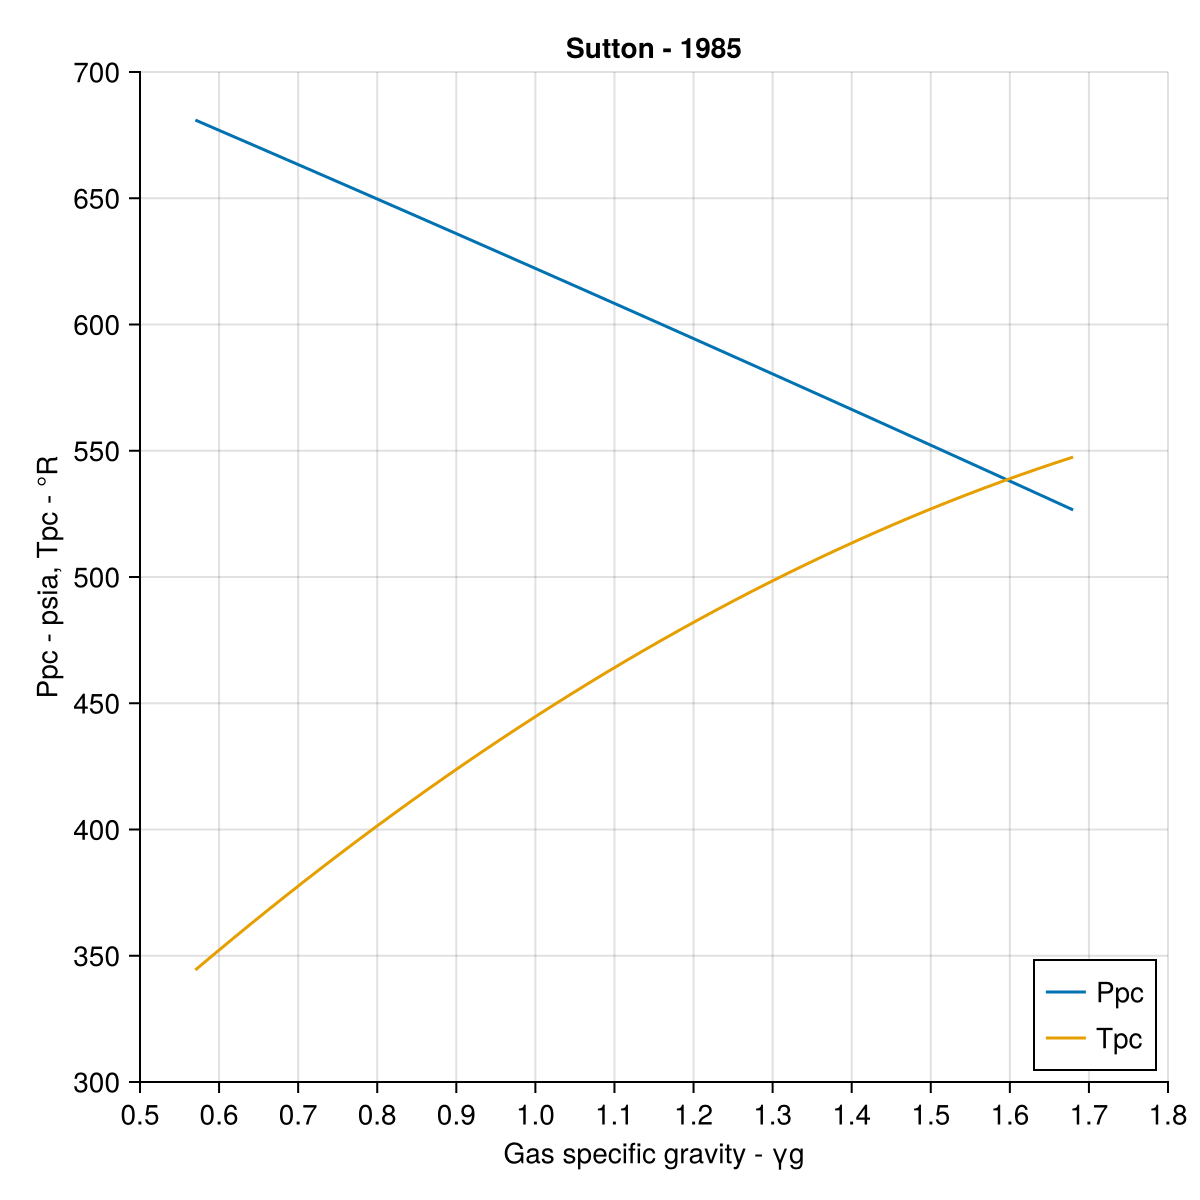

In [3]:
f1 = Figure(size=(600, 600))
ax1 = Axis(f1[1, 1], title="Sutton - 1985", xlabel="Gas specific gravity - γg", 
ylabel="Ppc - psia, Tpc - °R", xticks=collect(0.5:0.1:1.8), yticks=collect(300:50:700))

lines!(ax1, γg, Ppc_s, label="Ppc")
lines!(ax1, γg, Tpc_s, label="Tpc")

xlims!(ax1, 0.5, 1.8)
ylims!(ax1, 300, 700)
axislegend(position=:rb)
hidespines!(ax1,:t, :r)

f1

In [4]:
save("Figures\\fig_1.png", f1; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}


### Standing-Katz

In [5]:
Psr = collect(range(0, 15, length=750)) ;

In [6]:
Tsr1 = collect(range(1.05, 1.45, length=9))
Tsr2 = collect(range(1.5, 2, length=6))
Tsr3 = collect(range(2.2, 3, length=5))
Tsr = vcat(Tsr1, Tsr2, Tsr3) ;

In [7]:
col_names = ["1.05", "1.1", "1.15", "1.2", "1.25", "1.3", "1.35", "1.4", 
            "1.45", "1.5", "1.6", "1.7", "1.8", "1.9", "2", "2.2", "2.4", 
            "2.6", "2.8", "3"] ;

In [8]:
z_res = DataFrame([z_Dranchuk_Kassem(Psr[i], Tsr[j], 1, 1e-9)[2] for i in 1:length(Psr), j in 1:length(Tsr)], col_names)
first(z_res, 5)

Row,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.6,1.7,1.8,1.9,2,2.2,2.4,2.6,2.8,3
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.9939,0.9947,0.9954,0.996,0.9965,0.9969,0.9972,0.9975,0.9978,0.998,0.9984,0.9987,0.9989,0.9991,0.9993,0.9995,0.9996,0.9998,0.9998,0.9999
3,0.9877,0.9894,0.9908,0.992,0.9929,0.9938,0.9945,0.9951,0.9956,0.996,0.9968,0.9974,0.9978,0.9982,0.9985,0.999,0.9993,0.9995,0.9997,0.9998
4,0.9815,0.9841,0.9862,0.9879,0.9894,0.9906,0.9917,0.9926,0.9934,0.9941,0.9952,0.9961,0.9968,0.9973,0.9978,0.9985,0.9989,0.9993,0.9995,0.9997
5,0.9753,0.9787,0.9815,0.9839,0.9858,0.9875,0.9889,0.9901,0.9912,0.9921,0.9936,0.9948,0.9957,0.9964,0.997,0.998,0.9986,0.9991,0.9994,0.9997


In [9]:
function myplot(x, df, title, x_min, x_max, y_min, y_max, xticks, yticks, xlabel, ylabel, leg_title)
    f = Figure(size=(600, 600))
    ax = Axis(f[1, 1], title=title, xlabel=xlabel, ylabel=ylabel, xticks=xticks, yticks=yticks, xticklabelsize=:12, 
    yticklabelsize=12)

    for col in 1:size(df)[2]
        lines!(ax, x, df[:, col], label=names(df)[col])
    end
    
    xlims!(ax, x_min, x_max)
    ylims!(ax, y_min, y_max)
    Legend(f[1, 2], ax, leg_title, labelsize=10)
    hidespines!(ax, :t, :r)
    return f
end

myplot (generic function with 1 method)

In [10]:
function myplot(x, df, title, x_min, x_max, y_min, y_max, xticks, yticks, xlabel, ylabel, leg_title, position)
    f = Figure(size=(600, 600))
    ax = Axis(f[1, 1], title=title, xlabel=xlabel, ylabel=ylabel, xticks=xticks, yticks=yticks, xticklabelsize=:12, 
    yticklabelsize=12)

    for col in 1:size(df)[2]
        lines!(ax, x, df[:, col], label=names(df)[col])
    end
    
    xlims!(ax, x_min, x_max)
    ylims!(ax, y_min, y_max)
    axislegend(leg_title, labelsize=9, position=position)
    hidespines!(ax, :t, :r)
    return f
end

myplot (generic function with 2 methods)

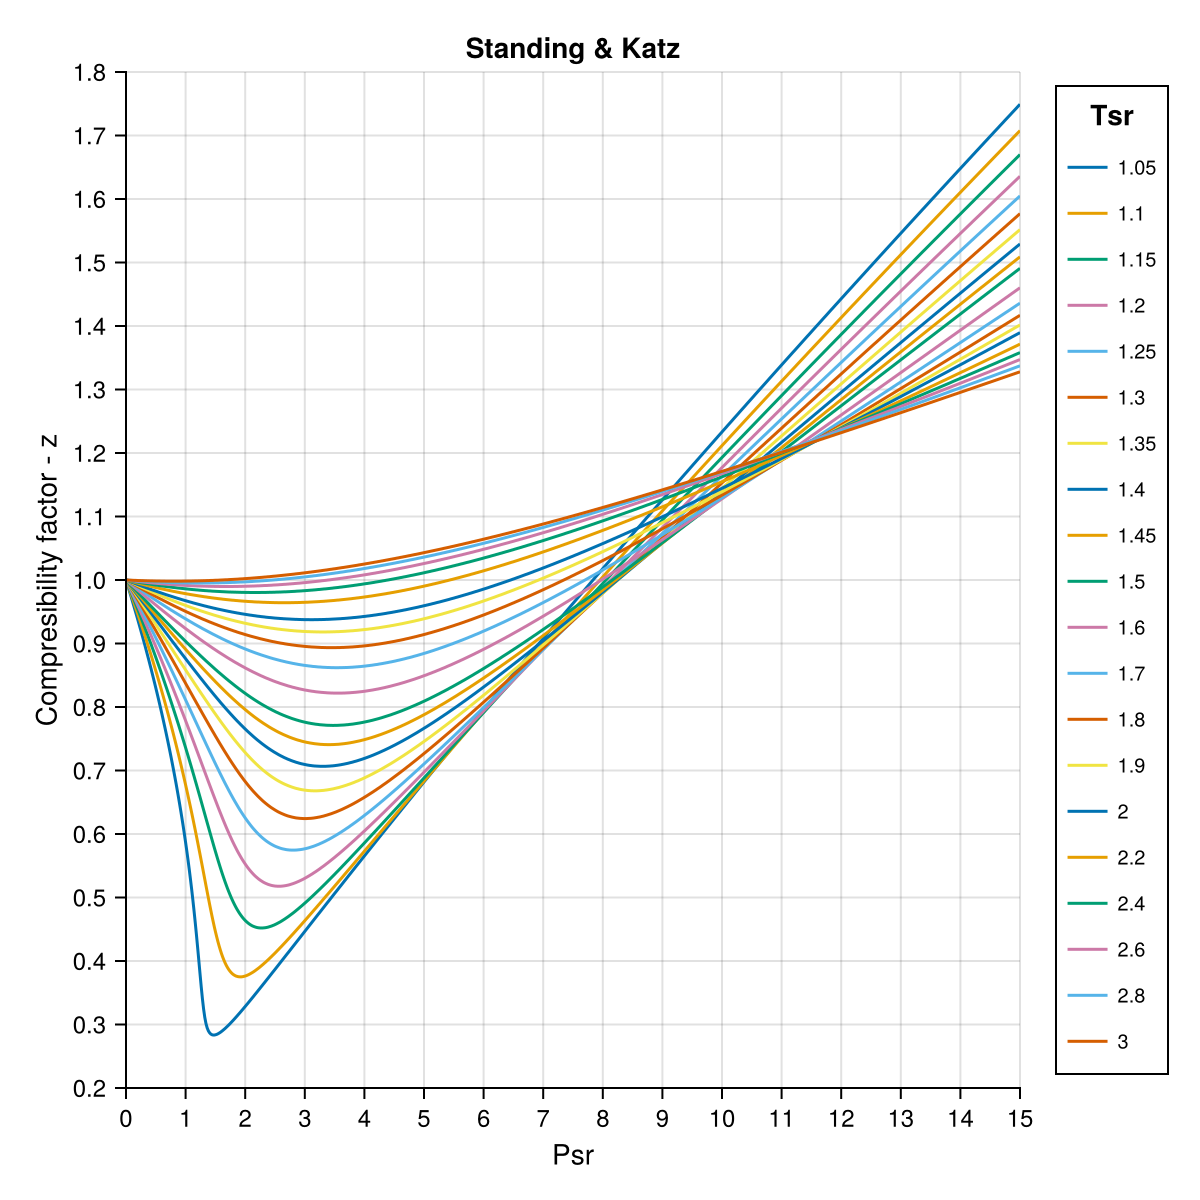

In [11]:
f2 = myplot(Psr, z_res, "Standing & Katz", 0, 15, 0.2, 1.8, collect(0:1:15), collect(0.2:0.1:1.8), "Psr",
"Compresibility factor - z", "Tsr")

In [12]:
save("Figures\\fig_2.png", f2; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}


### Gas a bajas presiones

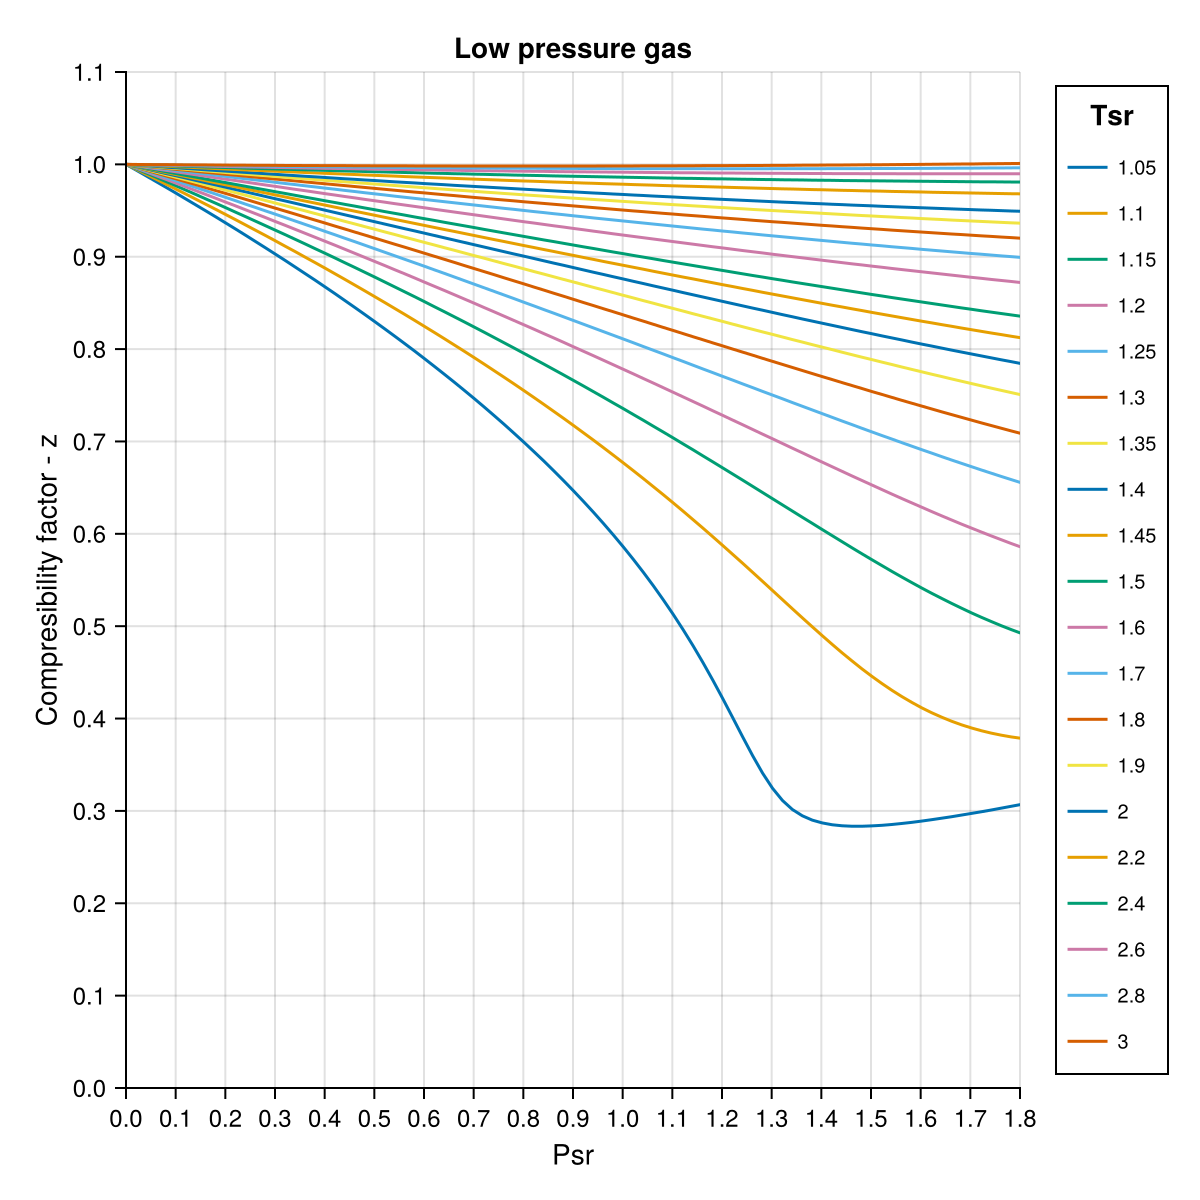

In [13]:
f3 = myplot(Psr, z_res, "Low pressure gas", 0, 1.8, 0, 1.1, collect(0:0.1:1.8), collect(0:0.1:1.1), "Psr",
"Compresibility factor - z", "Tsr")

In [14]:
save("Figures\\fig_3.png", f3; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}


### Gas a presiones atmosféricas

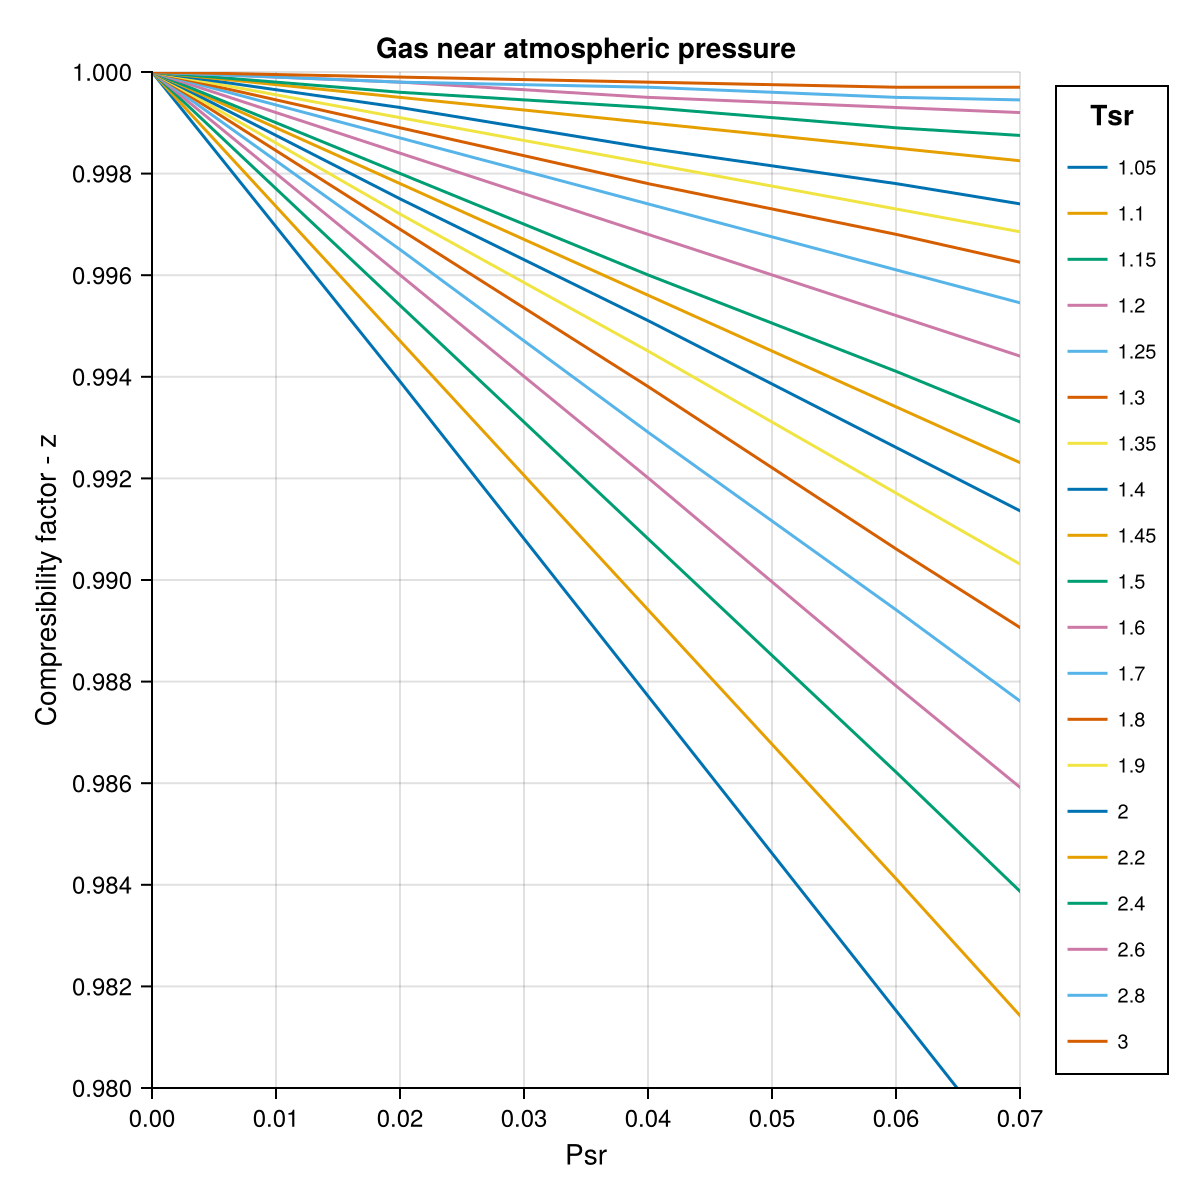

In [15]:
f4 = myplot(Psr, z_res, "Gas near atmospheric pressure", 0, 0.07, 0.98, 1, collect(0:0.01:0.07), collect(0.98:0.002:1), "Psr",
"Compresibility factor - z", "Tsr")

In [16]:
save("Figures\\fig_4.png", f4; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}


### Kessler-Lee

In [17]:
M_c7p = collect(range(100, 300, length=201))
Ge_c7p = collect(0.7:0.05:1.0)  ;

In [18]:
cn = ["0.7", "0.75", "0.8", "0.85", "0.9", "0.95", "1"] ;

In [19]:
Ppc_kl = DataFrame([PTsc_Kessler_Lee(M_c7p[i], Ge_c7p[j])[1] for i in 1:length(M_c7p), j in 1:length(Ge_c7p)], cn)
Tpc_kl = DataFrame([PTsc_Kessler_Lee(M_c7p[i], Ge_c7p[j])[2] for i in 1:length(M_c7p), j in 1:length(Ge_c7p)], cn)
first(Ppc_kl, 3)

Row,0.7,0.75,0.8,0.85,0.9,0.95,1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,422.466,465.414,507.344,548.199,587.951,626.594,664.136
2,418.405,461.144,502.888,543.576,583.181,621.693,659.118
3,414.405,456.936,498.494,539.018,578.476,616.857,654.166


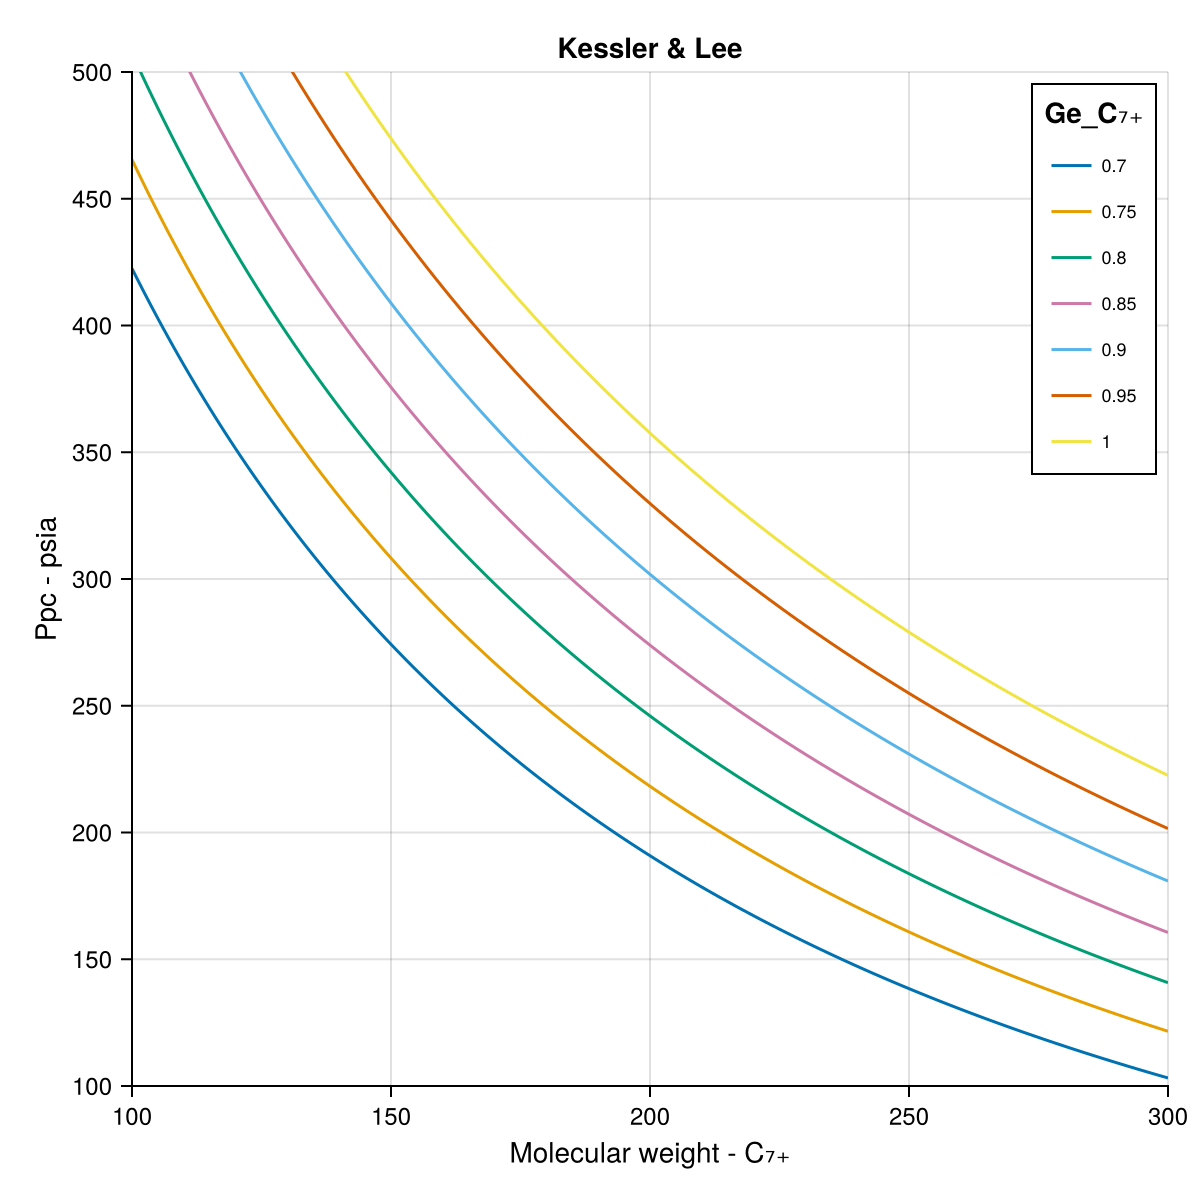

In [20]:
f5 = myplot(M_c7p, Ppc_kl, "Kessler & Lee", 100, 300, 100, 500, collect(100:50:300), collect(100:50:700), 
"Molecular weight - C₇₊", "Ppc - psia", "Ge_C₇₊", :rt)

In [21]:
save("Figures\\fig_5.png", f5; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}


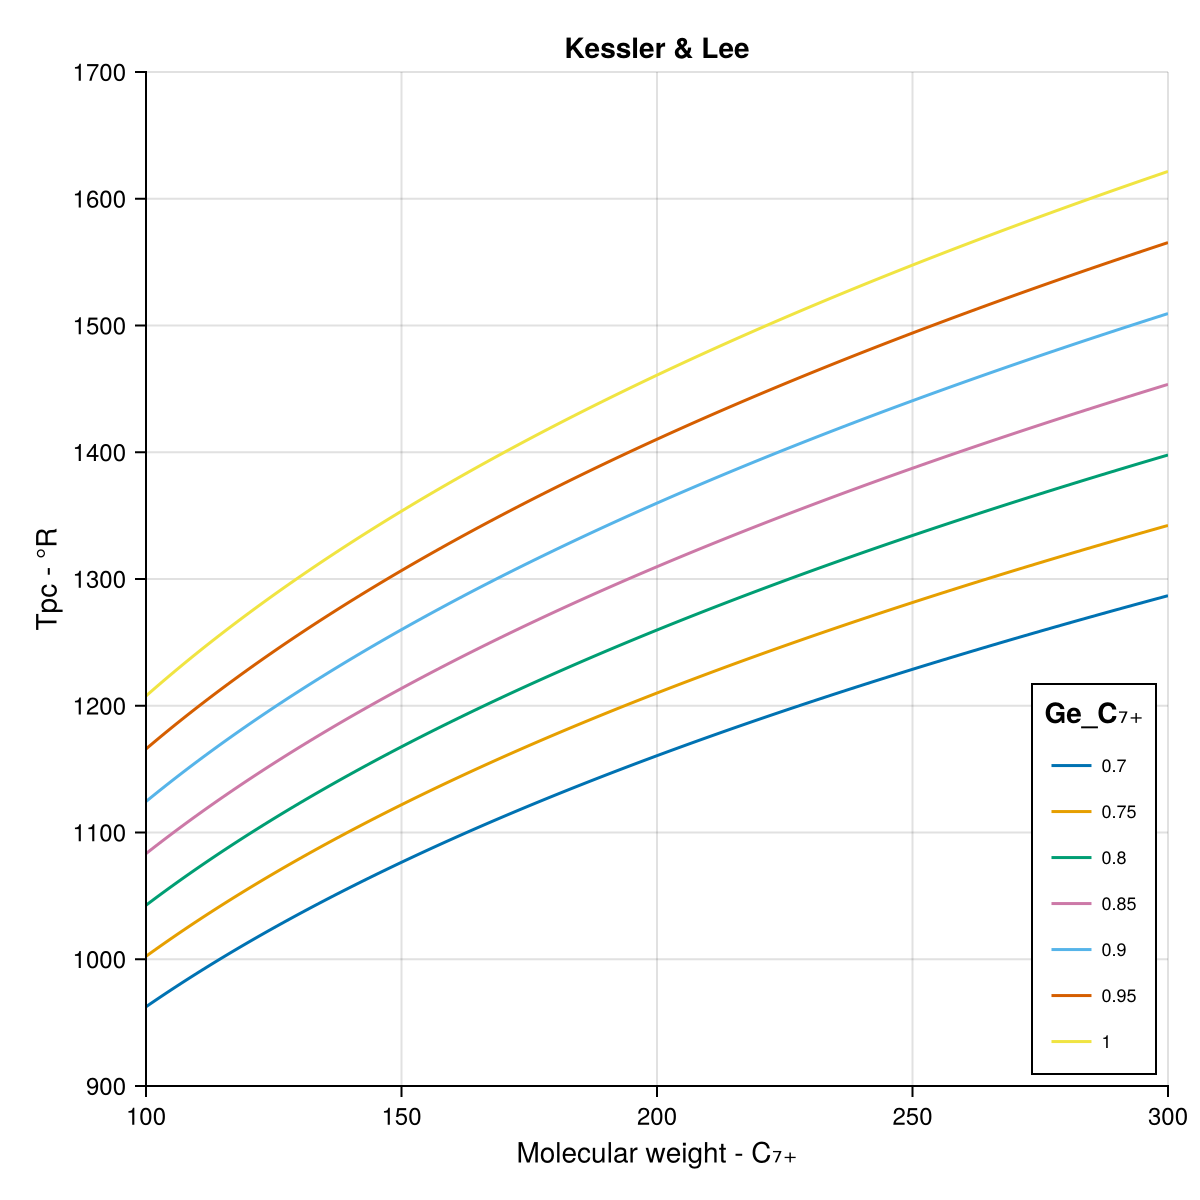

In [22]:
f6 = myplot(M_c7p, Tpc_kl, "Kessler & Lee", 100, 300, 900, 1700, collect(100:50:300), collect(900:100:1700), 
"Molecular weight - C₇₊", "Tpc - °R", "Ge_C₇₊", :rb)

In [23]:
save("Figures\\fig_6.png", f6; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}


#### Brown-Katz-Oberfell-Alden

In [24]:
# natural_gas
ge_ng = collect(range(0.56, 1.2, length=100))
Mw_ng = ge_ng .* 28.96

# condensate_gas
ge_cg = collect(range(0.56, 1.03, length=100))
Mw_cg = ge_cg .* 28.96 ;

In [25]:
Ppc_bkoa_ng = [PTsc_Brown_Katz_Oberfell_Alden([0,0,0], Mw_ng[i], "gn")[1] for i in 1:length(Mw_cg)]
Tpc_bkoa_ng = [PTsc_Brown_Katz_Oberfell_Alden([0,0,0], Mw_ng[i], "gn")[2] for i in 1:length(Mw_cg)]
Ppc_bkoa_cg = [PTsc_Brown_Katz_Oberfell_Alden([0,0,0], Mw_cg[i], "gc")[1] for i in 1:length(Mw_ng)]
Tpc_bkoa_cg = [PTsc_Brown_Katz_Oberfell_Alden([0,0,0], Mw_cg[i], "gc")[2] for i in 1:length(Mw_ng)] ;

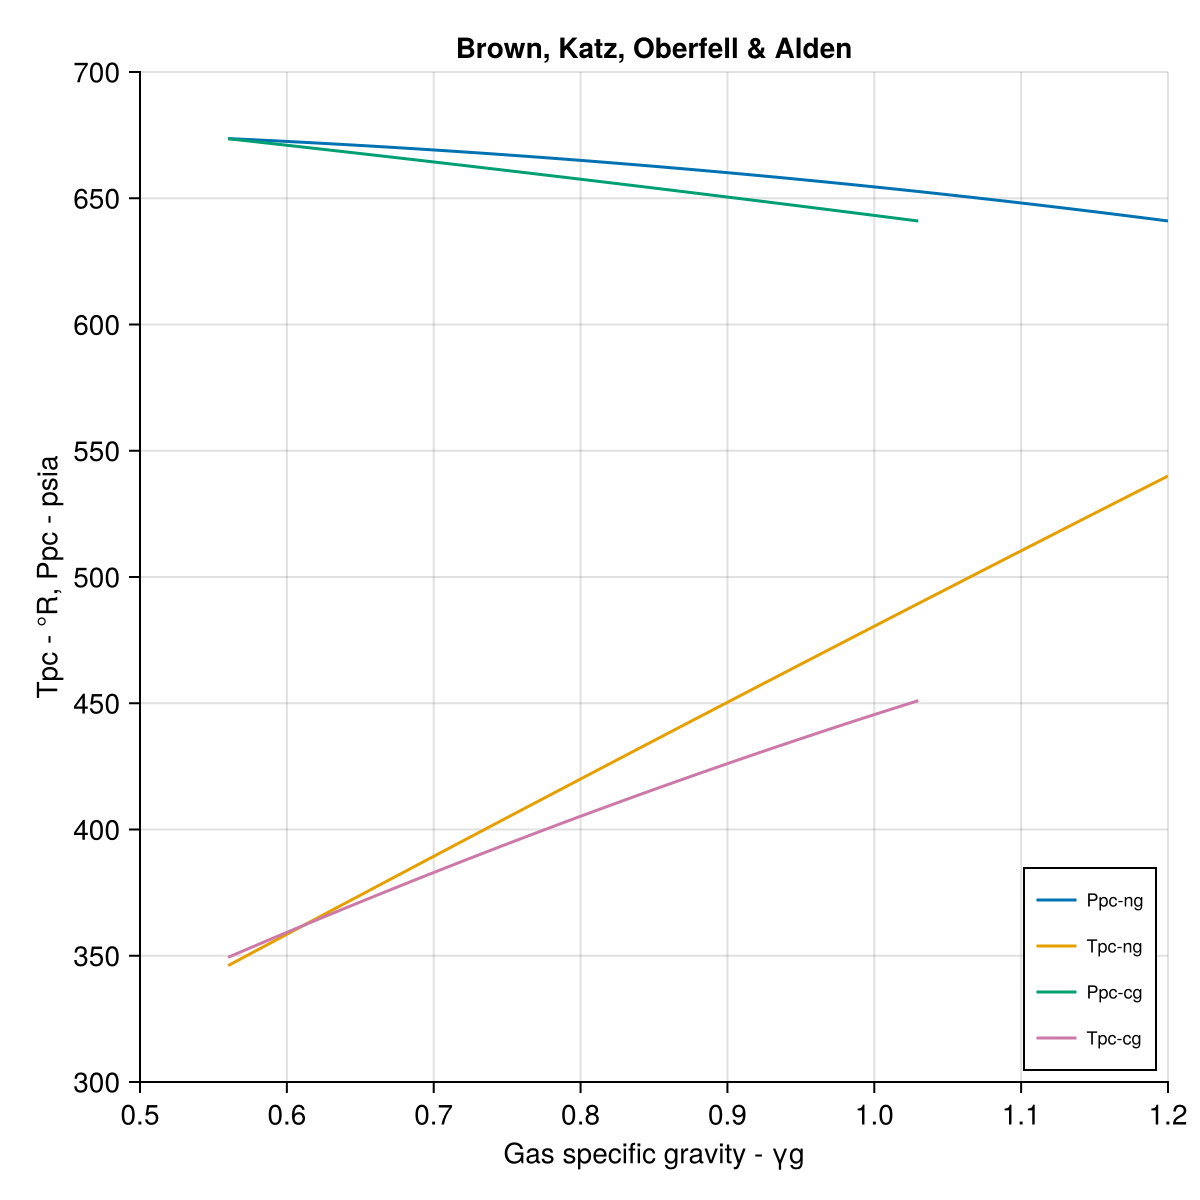

In [26]:
f7 = Figure(size=(600, 600))
ax7 = Axis(f7[1, 1], title="Brown, Katz, Oberfell & Alden", xlabel="Gas specific gravity - γg",
ylabel="Tpc - °R, Ppc - psia", xticks=collect(0.5:0.1:1.2), yticks=collect(300:50:700))

lines!(ax7, ge_ng, Ppc_bkoa_ng, label="Ppc-ng")
lines!(ax7, ge_ng, Tpc_bkoa_ng, label="Tpc-ng")
lines!(ax7, ge_cg, Ppc_bkoa_cg, label="Ppc-cg")
lines!(ax7, ge_cg, Tpc_bkoa_cg, label="Tpc-cg")

xlims!(ax7, 0.5, 1.2)
ylims!(ax7, 300, 700)
axislegend(labelsize=9, position=:rb)
hidespines!(ax7, :t, :r)

f7

In [27]:
save("Figures\\fig_7.png", f7; px_per_unit=2.0)

CairoMakie.Screen{IMAGE}
